In [2]:
import itertools
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt 
#from ortools.graph.python import linear_sum_assignment

## Artificial data

In [3]:
nodes = ['A', 'B', 'C', 'D', 'E', 'F']

clusters_colors = ['blue', 'orange', 'yellow']

assignments_t = [0, 0, 1, 1, 1, 2]
assignments_t_plus_1 = [0, 0, 0, 1, 2, 2]

## Brute Force Matching

In [5]:
#It returns a list with all the nodes divided in each cluster
#try it with:
#nodes = ['A', 'B', 'C', 'D', 'E', 'F']
#assignments_t = [0, 0, 1, 1, 1, 2]
#it returns: [['A', 'B'], ['C', 'D', 'E'], ['F']]]
def assign_nodes_to_clusters(nodes, assignments):
    clusters = {}
    for node, cluster_index in zip(nodes, assignments):
        if cluster_index not in clusters:
            clusters[cluster_index] = []
        clusters[cluster_index].append(node)
    return list(clusters.values())



#It returns all the possible combinations of clusters
#try it with: 
#clusters = [['A', 'B', 'C'], ['D'], ['E', 'F']]
#you have 3 clusters so you will have 3 factorial possible combinations
#it returns:
#(['A', 'B', 'C'], ['D'], ['E', 'F'])
#(['A', 'B', 'C'], ['E', 'F'], ['D'])
#(['D'], ['A', 'B', 'C'], ['E', 'F'])
#(['D'], ['E', 'F'], ['A', 'B', 'C'])
#(['E', 'F'], ['A', 'B', 'C'], ['D'])
#(['E', 'F'], ['D'], ['A', 'B', 'C'])
def find_combinations(clusters):
    permutations = itertools.permutations(clusters)
    all_permutations = []
    for perm in permutations:
        all_permutations.append(perm)
        #print(perm)
    return all_permutations   



#It finds the total utility of the matching between these two lists
#try it with these two lists:
#list1 = [['A', 'B'], ['C', 'D', 'E'], ['F']]
#list2 = [['A', 'B', 'C'], ['D'], ['E', 'F']]
#it returns 4
def count_common_elements(list1, list2):
    common_elements = 0
    for i in range(min(len(list1), len(list2))):
        common_elements += len(set(list1[i]) & set(list2[i]))
    return common_elements


#It uses brute force to find the matching with higher total utility value
def brute_force_matching(list_t, all_permutations):
    max_common_elements = 0
    list_t_plus_1_matched = None

    for list_t_plus_1 in all_permutations:
        common_elements = count_common_elements(list_t, list_t_plus_1)
        if common_elements > max_common_elements:
            max_common_elements = common_elements
            list_t_plus_1_matched = list_t_plus_1
    return list_t_plus_1_matched



list_t = assign_nodes_to_clusters(nodes, assignments_t)
print("List_t")
print(list_t)

list_t_plus_1 = assign_nodes_to_clusters(nodes, assignments_t_plus_1)

all_permutations = find_combinations(list_t_plus_1)
print('all permutations\n',list_t_plus_1)
#for perm in all_permutations:
#    print(perm)

list_t_plus_1_matched = brute_force_matching(list_t, all_permutations)
print("List_t_plus_1_matched")
print(list_t_plus_1_matched)


List_t
[['A', 'B'], ['C', 'D', 'E'], ['F']]
all permutations
 [['A', 'B', 'C'], ['D'], ['E', 'F']]
List_t_plus_1_matched
(['A', 'B', 'C'], ['D'], ['E', 'F'])


## Using NetworkX Bipartite Matching Minimum Weight Matching library

[[2. 1. 0.]
 [0. 1. 0.]
 [0. 1. 1.]]
{1: 4, 2: 5, 3: 6, 4: 1, 5: 2, 6: 3}


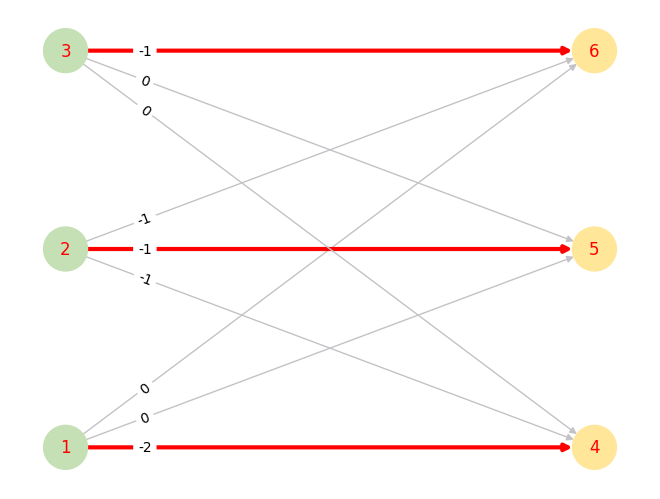

In [5]:
from networkx.algorithms import bipartite

def count_common_elements(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    return len(set1.intersection(set2))


def compute_utility_matrix(list_t_plus_1, list_t):
    N_clusters = len(list_t)
    matrix = np.zeros((N_clusters, N_clusters))

    for i, sublist_t_plus_1 in enumerate(list_t_plus_1):
        for j, sublist_t in enumerate(list_t):
            matrix[i][j] = count_common_elements(sublist_t_plus_1, sublist_t)
    print(matrix)        

compute_utility_matrix(list_t_plus_1, list_t)


B = nx.DiGraph()

top_nodes = [1,2,3]
bottom_nodes = [4,5,6]


B.add_nodes_from(top_nodes, bipartite=0, color='#C5E0B4')
B.add_nodes_from(bottom_nodes, bipartite=1, color='#FFE699')


node_pos = nx.bipartite_layout(B, top_nodes)

B.add_edge(1, 4, weight=-2, color='b', width=1)
B.add_edge(2, 4, weight=-1, color='b', width=1)
B.add_edge(3, 4, weight=0, color='b', width=1)
B.add_edge(1, 5, weight=0, color='b', width=1)
B.add_edge(2, 5, weight=-1, color='b', width=1)
B.add_edge(3, 5, weight=0, color='b', width=1)
B.add_edge(1, 6, weight=0, color='b', width=1)
B.add_edge(2, 6, weight=-1, color='b', width=1)
B.add_edge(3, 6, weight=-1, color='b', width=1)

my_matching = bipartite.matching.minimum_weight_full_matching(B, top_nodes, "weight")
print(my_matching)


assignments = list(my_matching.items())

edge_colors = ["r" if edge in assignments else "#C4C2C6" for edge in B.edges()]
edge_width = [3 if edge in assignments else 1 for edge in B.edges()]


node_colors  = list(nx.get_node_attributes(B, 'color').values())
nx.draw(B, pos=node_pos, with_labels=True, font_color= 'red', node_size=1000, node_color=node_colors, edge_color=edge_colors, width=edge_width)
label1 = nx.get_edge_attributes(B,'weight')
nx.draw_networkx_edge_labels(B, node_pos, edge_labels=label1, label_pos=0.85)
plt.show()



## Using Scipy Linear Sum Assignment library (Jonker-Volgenant-Castanon (JVC) algorithm) 

In [19]:
from scipy.optimize import linear_sum_assignment

costs = np.array([
    [90, 76, 75, 70],
    [35, 85, 55, 65],
    [125, 95, 90, 105],
    [45, 110, 95, 115]
])

row_ind, col_ind = linear_sum_assignment(costs)
print("Row index", row_ind, '\nColumn Index', col_ind)
print("Total cost = ", costs[row_ind, col_ind].sum())

Row index [0 1 2 3] 
Column Index [3 2 1 0]
Total cost =  265


## Dynamic Programming

In [11]:
def find_max_total_value(matrix):
    rows = len(matrix)
    cols = len(matrix[0])

    # Inizializza la matrice dp e la matrice degli accoppiamenti
    dp = [[0 for _ in range(cols + 1)] for _ in range(rows + 1)]
    couples = [[-1 for _ in range(cols + 1)] for _ in range(rows + 1)]

    # Calcola il massimo valore totale possibile e registra gli accoppiamenti
    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            max_value = 0
            max_k = -1
            for k in range(j):
                value = dp[i - 1][k] + matrix[i - 1][j - 1]
                if value > max_value:
                    max_value = value
                    max_k = k
            dp[i][j] = max_value
            couples[i][j] = max_k

    # Trova l'indice della femmina migliore per l'ultimo maschio
    max_j = -1
    max_total_value = 0
    for j in range(cols + 1):
        if dp[rows][j] > max_total_value:
            max_total_value = dp[rows][j]
            max_j = j

    # Costruisci gli accoppiamenti utilizzando la matrice degli accoppiamenti
    pairings = []
    for i in range(rows, 0, -1):
        pairings.append((f'M{rows - i + 1}', f'F{max_j}'))
        max_j = couples[i][max_j]

    # Inverti l'ordine degli accoppiamenti per ottenere la sequenza corretta
    pairings = pairings[::-1]

    return max_total_value, pairings

# Esempio di utilizzo con la matrice dei valori degli accoppiamenti
matrix = [
    [3, 2, 7],   # Persona A: peso 3 per Lavoro X, peso 2 per Lavoro Y, peso 7 per Lavoro Z
    [5, 1, 4],   # Persona B: peso 5 per Lavoro X, peso 1 per Lavoro Y, peso 4 per Lavoro Z
    [6, 3, 2]
]
max_total_value, pairings = find_max_total_value(matrix)

print("Massimo valore totale possibile:", max_total_value)
print("Accoppiamenti:")
for male, female in pairings:
    print(f"{male} -> {female}")


Massimo valore totale possibile: 8
Accoppiamenti:
M3 -> F0
M2 -> F1
M1 -> F2
